In [2]:
import matplotlib.pylab as plt
import numpy as np

### For CGISim to be able to handle spectra, the files need to be .dat files, with a format that looks like: 
<div>
<img src="attachment:Screenshot%202024-03-21%20at%203.00.05%E2%80%AFPM-2.png" width="250"/>
</div>

The spectrum units can be one of four types:

|   Name   |   Units               | 
|:--------:|:---------------------:|
|  FLAM    |  erg / s / cm^2 / A   | 
|    JY    |     Jansky            | 
|   FNU    | erg / s / cm^2 / Hz   |  
| PHOTLAM  | photon / s / cm^2 / A |

but all flux will be converted to units of `PHOTLAM` in the script. Wavelength must be given in Angstroms.

If your spectral file is given in different units, they will need to be converted before they can be used in CGISim.

In [3]:
# Wavelength conversion factors
um_to_A = 1e4   # convert um to Angstroms
nm_to_A = 10    # convert nm to Angstroms
cm_to_A = 1e8

Load in planet spectrum:

In [45]:
filepath = "/Users/sammyh/Documents/Projects/planet_modeling/Cahoy_et_al_2010_Albedo_Spectra/albedo_spectra/"
planet_file = "Jupiter_1x_5AU_0deg.dat"
wavelength, alb_spec = np.loadtxt(filepath + planet_file, unpack=True)
r = 5 # [AU] distance from star
r = r * 1.496e8 # km
R_p = 69911.0   # km
# This spectrum has wavelength in um and the spectrum is albedo spectrum

# Convert the planet wavelengths to Angstroms:
wavelength = np.array([x*um_to_A for x in wavelength])

Load in solar spectrum:

In [46]:
solar_filepath = "/Users/sammyh/Documents/Projects/planet_modeling/Cahoy_et_al_2010_Albedo_Spectra/SOLARSPECTRUM.DAT"
solar_wavelength, solar_spec1 = np.loadtxt(solar_filepath, unpack=True)
# Solar spectrum has wavelength in Angstroms and spectrum has units of cgs/Angstrom

In [47]:
# Adjust stellar spectrum for distance of planet from star
solar_spec = solar_spec1 / r**2
# Interpolate solar spectrum on planet wavelength grid
solar_flux = np.interp(wavelength, solar_wavelength, solar_spec)

92638.763796902
1.6557301430713987e-13


Text(0.5, 0, 'wavelength (A)')

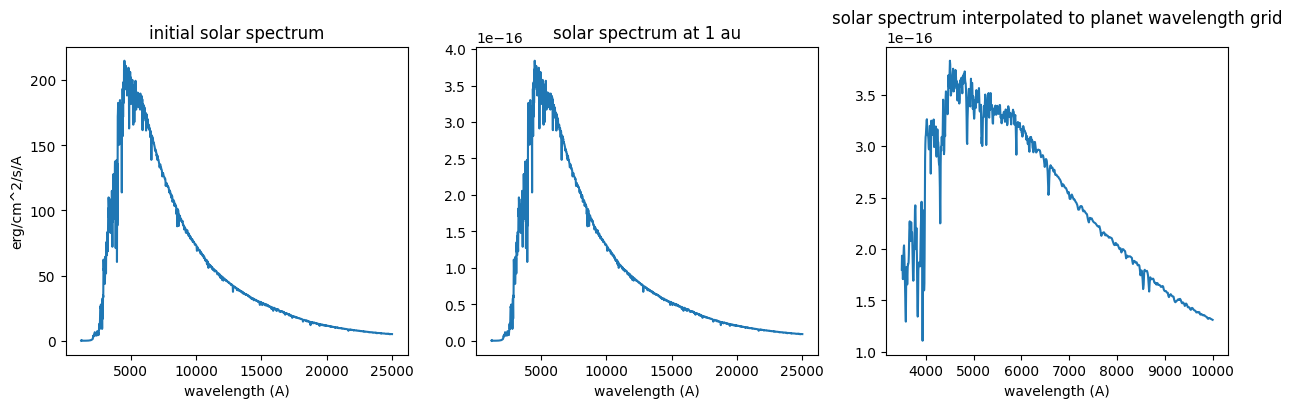

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.plot(solar_wavelength, solar_spec1)
ax1.set_title('initial solar spectrum')
ax1.set_ylabel('erg/cm^2/s/A')
ax1.set_xlabel('wavelength (A)')
print(np.sum(solar_spec1))

ax2.plot(solar_wavelength, solar_spec)
ax2.set_title('solar spectrum at 1 au')
ax2.set_xlabel('wavelength (A)')
ax2.set_ylabel('')
print(np.sum(solar_spec))

ax3.plot(wavelength, solar_flux)
ax3.set_title('solar spectrum interpolated to planet wavelength grid')
ax3.set_xlabel('wavelength (A)')

**Convert planet spectrum from albedo to flux space:**

In [49]:
# planet_flux = alb_spec * solar_flux # A_g(lambda) * F_star(lambda) = F_planet(lambda)
planet_flux = alb_spec * solar_flux * (R_p / r)**2 # A_g(lambda) * F_star(lambda) * (Rp/r)^2
fpfs = planet_flux / solar_flux # check planet-star flux ratio

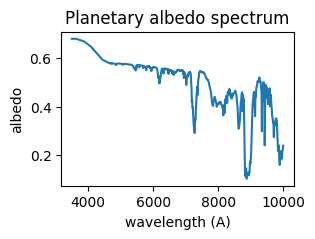

In [50]:
plt.figure(figsize=(3,2))
plt.plot(wavelength, alb_spec)
plt.xlabel('wavelength (A)')
plt.ylabel('albedo')
plt.title('Planetary albedo spectrum')
plt.show()

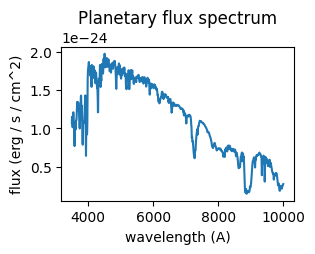

In [51]:
plt.figure(figsize=(3,2))
plt.plot(wavelength, planet_flux)
plt.ylabel('flux (erg / s / cm^2)')
plt.xlabel('wavelength (A)')
plt.title('Planetary flux spectrum')
plt.show()

Text(0.5, 0, 'wavelength (A)')

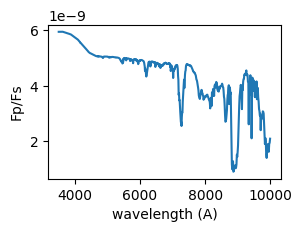

In [52]:
plt.figure(figsize=(3,2))
plt.plot(wavelength, fpfs)
plt.ylabel('Fp/Fs')
plt.xlabel('wavelength (A)')

### Write converted planet spectrum to file:
- Header should contain only units of spectrum
- First column: wavelength
- Second column: spectrum

In [190]:
spec_units = 'flam'
wave_units = 'angstroms'
spec_data = np.column_stack((wavelength, planet_flux))

filename = planet_file[:-4] + "_Angstroms_FLAM.dat"
np.savetxt('/Users/sammyh/Desktop/'+filename, spec_data, fmt='%.4f', 
          header='angstroms,flam', delimiter='\t', comments='')

## To convert the planet-star flux ratio to a magnitude:
$m_{planet} = m_{star} - 2.5 log_{10}( \frac{F_{planet}}{F_{star}})$

$\frac{F_p}{F_s} = A_g(\lambda) * \Phi(\lambda) * (\frac{R_p}{d})^2$

In [193]:
m_star = 5.0 
phi_lambda = 1.0 # phase function = 1.0 at phase = 0°
R_p = 69911      # Radius of Jupiter in km
band1_center = 5738 # center of band 1 in Angstroms

m_planet = m_star - 2.5 * np.log10(alb_spec * phi_lambda * (R_p / r)**2) # spectrum in units of magnitude

In [194]:
# Get index of center of wavelength band to grab planet magnitude
center_id = np.abs(wavelength - band1_center).argmin()
print('center id: ', center_id)
planet_mag = m_planet[center_id]
planet_mag

center id:  372


23.478726081403888